In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28),name='Flatten_1'),
    Dense(16,activation='relu',name='Layer_1'),
    Dense(16,activation='relu',name='Layer_2'),
    Dense(10),
    Softmax()
])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
Layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense (Dense)                (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),MaxPooling2D((3,3)),Flatten(),Dense(10,activation='softmax')])


In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x754288711128>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x754288711860>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images = test_images / 255


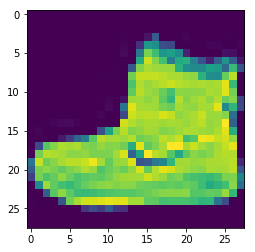

Ankle boot


In [19]:
# Display one of the images
img = train_images[0,:,:]
plt.imshow(img)
plt.show()
print(labels[train_labels[0]])

#### Fit the model

In [24]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels,epochs = 5, batch_size=256)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 52s 873us/sample - loss: 0.4457 - sparse_categorical_accuracy: 0.8420 - mean_absolute_error: 4.4200
Epoch 2/5
60000/60000 [==============================] - 51s 848us/sample - loss: 0.4196 - sparse_categorical_accuracy: 0.8519 - mean_absolute_error: 4.4200
Epoch 3/5
60000/60000 [==============================] - 51s 852us/sample - loss: 0.4039 - sparse_categorical_accuracy: 0.8564 - mean_absolute_error: 4.4200
Epoch 4/5
60000/60000 [==============================] - 50s 833us/sample - loss: 0.3911 - sparse_categorical_accuracy: 0.8613 - mean_absolute_error: 4.4200
Epoch 5/5
60000/60000 [==============================] - 51s 843us/sample - loss: 0.3789 - sparse_categorical_accuracy: 0.8665 - mean_absolute_error: 4.4200


#### Plot training history

In [25]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.445730,0.842000,4.420000
1,0.419626,0.851900,4.420001
2,0.403940,0.856350,4.420002
3,0.391123,0.861300,4.420000
4,0.378899,0.866467,4.420002


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

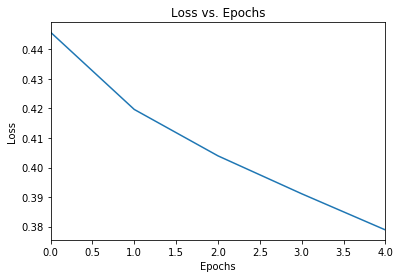

In [26]:
# Make a plot for the loss

loss_plot = df.plot(y='loss',title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss')

[Text(0, 0.5, 'Acc'), Text(0.5, 0, 'Epochs')]

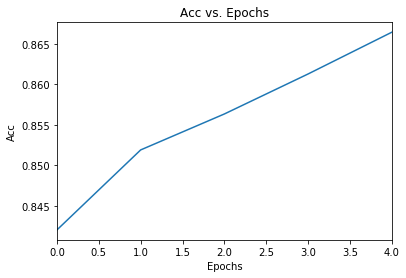

In [28]:
# Make a plot for the accuracy
acc_plot = df.plot(y='sparse_categorical_accuracy',title='Acc vs. Epochs', legend=False)
acc_plot.set(xlabel='Epochs',ylabel='Acc')


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

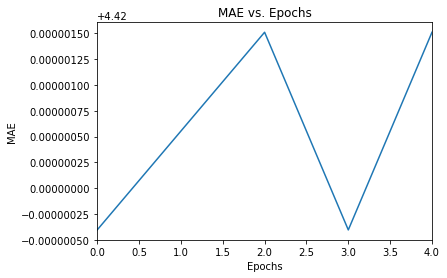

In [29]:
# Make a plot for the additional metric
mae_plot = df.plot(y='mean_absolute_error',title='MAE vs. Epochs', legend=False)
mae_plot.set(xlabel='Epochs',ylabel='MAE')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [31]:
# Evaluate the model
test_loss, test_acc, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels,verbose=2)


10000/1 - 5s - loss: 0.3157 - sparse_categorical_accuracy: 0.8515 - mean_absolute_error: 4.4200


#### Make predictions from the model

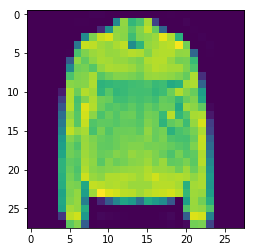

Label: Coat


In [40]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [41]:
# Get the model predictions
prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print(labels[np.argmax(prediction)])

Coat
